<a href="https://colab.research.google.com/github/leotheoak/donwloaded/blob/main/graph%20neural%20first%20example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install PyTorch Geometric and its dependencies
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.2.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00


In [5]:
import torch
from torch_geometric.nn import GCNConv

x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])  # 4 nodes, 1 feature each
edge_index = torch.tensor([[0, 1, 2, 3, 0, 2],
                           [1, 0, 3, 2, 2, 0]])  # edges: (0-1), (1-0), ...

conv = GCNConv(1, 2)  # 1 input feature, 2 output features
out = conv(x, edge_index)

print(out.shape)  # => torch.Size([4, 2])

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


torch.Size([4, 2])


In [6]:
import torch
print(torch.__version__)

2.6.0+cu124


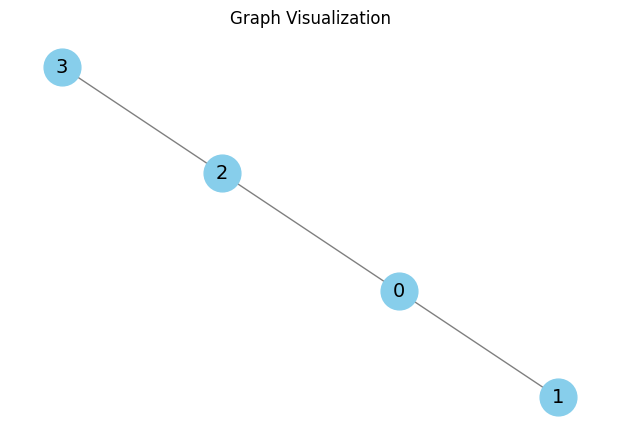

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
edges = list(zip(edge_index[0].tolist(), edge_index[1].tolist()))
G.add_edges_from(edges)

plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)   # or nx.circular_layout(G), nx.kamada_kawai_layout(G), etc.
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=700, font_size=14)
plt.title("Graph Visualization")
plt.show()